Praktikum zu Vorlesung
[__Modellreduktion parametrisierter Systeme__](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/)

Mario Ohlberger, Felix Schindler

# Blatt 02, 17.04.2019

## Aufgabe 0: Funktionen wieder verwendbar machen

1. Aktivieren Sie wie gewohnt ihre Arbeitsumgebung und starten Sie den Jupyter Notebook server, siehe zB [Blatt 1, Aufgabe 0](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_01__aufgaben.html#Aufgabe-0:-jupyter-Notebook-Server-starten).

2. Erstellen Sie ein neues `Python 3` notebook oder laden Sie dieses von der Homepage herunter.

3. Importieren Sie `numpy` und `pymor.basic` und machen Sie `matplotlib` für das Notebook nutzbar.

In [1]:
%matplotlib notebook
import numpy as np
from pymor.basic import *

4. Erstellen Sie eine neue Textdatei und benennen Sie diese in `interpolations.py` um.

5. Kopieren Sie die Funktionen `interpolate_lagrange_p1` und `interpolate_fv` aus den letzten Blättern in diese neue Datei, sodass diese Funktionen in Zukunft wiederverwendet werden können.
   Kopieren Sie insbesondere alle dazu nötigen imports.

6. Ändern Sie die `interpolate_lagrange_p1`, sodass anstelle des bisherigen `NumpyVectorSpace` der `CGVectorSpace` aus dem `pymor.operators.cg` Modul benutzt wird; entsprechend in `interpolate_fv` der `FVVectorSpace` aus dem `pymor.operators.fv` Modul.

7. Führen Sie zum Test `from interpolations import (interpolate_fv, interpolate_lagrange_p1)` in Ihrem Notebook aus.

In [2]:
from interpolations import (interpolate_fv, interpolate_lagrange_p1)

8. Erstellen Sie eine neue Textdatei und benennen Sie diese in `visualizations.py` um.

9. Kopieren Sie analog die Funktionen `visualize_fv`, `visualize_grid`, `visualize_lagrange_p1` sowie alle dazu nötigen Imports und testen Sie den Import dieser Fnuktionen in Ihrem Notebook.

In [3]:
from visualizations import (visualize_fv, visualize_grid, visualize_lagrange_p1)

## vereinfachtes paramter-unabhängiges Diffusionsproblem

Wir betrachten ein vereinfachtes parameter-unabhängiges __Diffusionsproblem__.
Sei dazu

* ein beschränktes polygonales Gebiet $\Omega \subset \mathbb{R}^d$, $d = 1, 2, 3$ mit
* Lipschitz-Rand $\partial \Omega$,
* eine Diffusion $A \in L^\infty(\Omega)$ oder $A \in [L^\infty(\Omega)]^{d \times d}$ und
* eine rechte Seite $f \in L^2(\Omega)$

gegeben.
Gesucht ist eine schwache Lösung $u \in H^1_0(\Omega)$, sodass

$$\begin{align}
-\nabla\cdot( A \nabla u ) &= f &&\text{in } \Omega\\
u &= 0 &&\text{auf } \partial \Omega,
\end{align}$$

im schwachen Sinne erfüllt ist, also äquivalent: wir suchen $u \in H^1_0(\Omega)$ als Lösung des _Variationsproblems_

$$\begin{align}
b(u, v) &= l(v) &&\text{für alle } v \in H^1_0(\Omega)
\end{align}$$

mit der Bilinearform $b: H^1(\Omega) \times H^1(\Omega) \to \mathbb{R}$ definiert durch

$$b(u, v) := \int_\Omega (A \nabla u) \cdot \nabla v \text{d}x$$

und dem linearen Funktional $l: H^1(\Omega) \to \mathbb{R}$ definiert durch

$$l(v) := \int_\Omega f v \text{d}x.$$

_Beachte_, dass sowohl $b$ als auch $l$ bezüglich $H^1(\Omega)$ definiert werden können, die Lösung des Variationsproblems aber nur in $H^1_0(\Omega)$ gesucht wird.

#### Bemerkung

In der Praxis werden wir die Integrale in der Definition von $b$ und $l$ durch numerische Quadraturen ersetzen, die für allgemeine (nicht-polinomielle Datenfunktionen $A$ und $f$) nicht exakt integrieren.
Wir erhalten dadurch __Approximationen $b_h$ von $b$ und $l_h$ von $l$__.
Wir werden aber im Folgenden nicht zwischen $b$ und $l$ und ihren Approximationen unterscheiden!

## Intermezzo: Hilberträume, Operatoren, Bilinearformen, Produkte, Normen

Seien $V$, $W$ reelle Hilberträume. Dann kann jede Bilinearform $b: W \times V \to \mathbb{R}$ eindeutig mit einem linearen Operator $L: V \to W'$ identifiziert werden, wobei $W'$ der Dualraum zu $W$ ist, d.h.

$$B: V \to W', \quad v\mapsto B[v] \in W'$$

wobei das Funktional $B[v]$ definiert ist durch

$$B[v]: W \to \mathbb{R},\quad w \mapsto B[v](w) := b(w, v).$$

Äquivalent kann jeder lineare Operator $B: V \to W'$ eindeutig mit einer Bilinearform

$$b: W \times V \to \mathbb{R},\quad (w, v) \mapsto b(w, v) := B[v](w)$$

identifiziert werden.

_Zum Beispiel_ entsprict $b$ wie oben definiert für konstante Diffusion $A = 1$ dem (schwachen) Laplace Operator $\Delta$ bezüglich der Hilberträume $V = W = H^1(\Omega)$.

### Bemerkung: $H^1$ und $H^1_0$ Produkt und Norm

Für konstante Diffusion $A = 1$ entspricht die Bilinearform $b$ dem $H^1$-semi Produkt und induziert die $H^1$ Halbnorm

$$|v|_{H^1} := \sqrt{\int_\Omega \nabla v \cdot \nabla v \;\text{d}x} = \sqrt{b(v, v)}\quad\quad\text{für } v \in H^1(\Omega).$$

Eingeschränkt auf $H_0^1(\Omega) \subset H^1(\Omega)$ hingegen entspricht $b$ (für $A = 1$) dem $H_0^1$ Produkt und induziert damit die $H^1_0$ Norm (die aufgrund der Poincare Ungleichung eine Norm ist), also

$$\|v\|_{H^1_0} := |v|_{H^1}\quad\quad\text{für } v \in H^1_0(\Omega).$$

## Aufgabe 1: das $H^1$-semi Produkt

Für konstante Diffusion $A = 1$ entspricht die Bilinearform $b$ dem $H^1$-semi Produkt (bzw. der associierte Operator $B$ dem schwachen Laplace Operator $\Delta$) und induziert die $H^1$ Halbnorm

$$|v|_{H^1} := \sqrt{\int_\Omega \nabla v \cdot \nabla v \;\text{d}x} = \sqrt{b(v, v)}\quad\quad\text{für } v \in H^1(\Omega).$$

Eingeschränkt auf $H_0^1(\Omega) \subset H^1(\Omega)$ hingegen entspricht $b$ (für $A = 1$) dem $H_0^1$ Produkt und induziert damit die $H^1_0$ Norm (die aufgrund der Poincare Ungleichung eine Norm ist), also

$$\|v\|_{H^1_0} := |v|_{H^1}\quad\quad\text{für } v \in H^1_0(\Omega).$$

1. Erstellen Sie ein Dreiecksgitter $\mathcal{T}_h$ mit $2^2$ Intervallen als Partition des Gebiets $\Omega = [0, 1]^2$ und visualisieren Sie es mit Hilfe der entsprechenden Funktion aus `visualizations.py`.

<IPython.core.display.Javascript object>


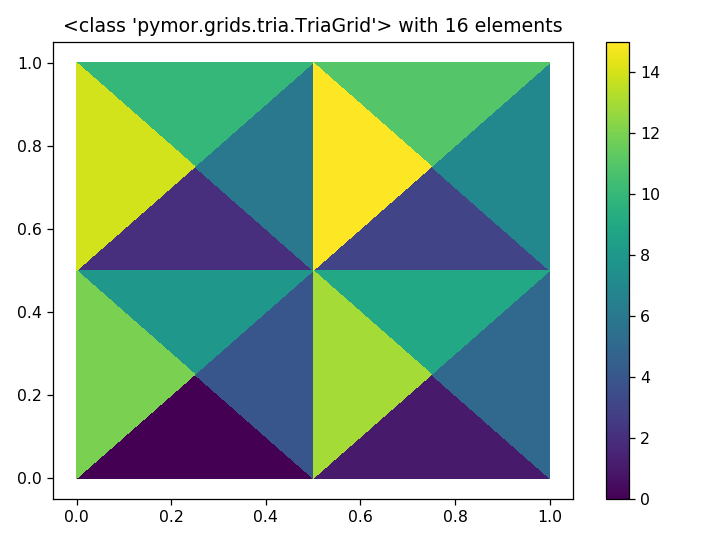

In [4]:
omega = RectDomain(([0, 0], [1, 1]))
grid = TriaGrid(domain=omega.domain, num_intervals=(2, 2))

visualize_grid(grid)

2. Erstellen Sie einen `CGVectorSpace` aus dem `pymor.operators.cg` Modul und vergleichen Sie dessen Dimension mit der Anzahl der Knoten des Gitters.

In [5]:
from pymor.operators.cg import CGVectorSpace

cg_space = CGVectorSpace(grid)
print('S_h^1 = {}'.format(cg_space))
print('number of grid nodes: {}'.format(grid.size(grid.dim)))

S_h^1 = NumpyVectorSpace(13, STATE)
number of grid nodes: 13


3. Generell werden in pyMOR Operatoren, Bilinearformen und Produkte durch Operatoren dargestellt, die von [pymor.operators.interfaces.OperatorInterface](http://docs.pymor.org/en/0.5.1/generated/pymor.operators.html#pymor.operators.interfaces.OperatorInterface) ableiten.

   Auf einem `TriaGrid` wird die Bilinearform $b$ von oben für beliebige Diffusion $A$ durch den `DiffusionOperatorP1` aus dem `pymor.operators.cg` Modul repräsentiert.
   
   - Nutzen Sie den `DiffusionOperatorP1`, um den Laplace Operator $\Delta$ (und damit das $H^1$-semi Produkt) bezüglich $S_h^1 \subset H^1(\Omega)$ zu definieren (nicht $H^1_0(\Omega)$!). Nutzen Sie dazu in der [pyMOR Dokumentation](http://docs.pymor.org/en/0.5.1/) in der API Dokumentation im `operators` Paket im `cg` Modul die entsprechende Hilfe oder zeigen Sie sich die Dokumentation im Notebook an.
   
     _Achtung:_ der `DiffusionOperatorP1` beinhaltet eine automatische Randwertbehandlung (mehr dazu unten), stellen Sie sicher, dass Sie den Operator bezüglch $H^1(\Omega)$ und nicht $H^1_0(\Omega)$ anlegen.
   Suchen Sie dazu in der pyMOR Dokumentation in der API Dokumentation im `grids` Paket im `boundaryinfos` Modul nach einer geeigneten Möglichkeit.
   
   - Lassen Sie sich den erstellten Operator sowie dessen Typ anzeigen. Ist dieser Operator linear?

In [6]:
from pymor.operators.cg import DiffusionOperatorP1

# => Hilfe anzeigen mit DiffusionOperatorP1?

# => Dieser Operator beinhaltet Randwertbehandlung:
# Für den Leplace Operator bezüglich H^1 benötigen wir also eine boundary_info,
# die keinen Dirichlet-Rand definiert.

h1_semi_product = DiffusionOperatorP1(grid, boundary_info=EmptyBoundaryInfo(grid))

print('h1_semi_product is a {}'.format(h1_semi_product))
print('the type of h1_semi_product is {}'.format(type(h1_semi_product)))
if h1_semi_product.linear:
    print('h1_semi_product is linear')

h1_semi_product is a DiffusionOperatorP1: R^13 --> R^13  (parameter type: None, class: DiffusionOperatorP1)
the type of h1_semi_product is <class 'pymor.operators.cg.DiffusionOperatorP1'>
h1_semi_product is linear


4. Jeder Operator $B: V \to W$ in pyMOR erlaubt Zugriff auf seinen Definitionsbereich $V$ und sein Bildraum $W$.
   Lassen Sie sich diese anzeigen (siehe Dokumentation) und stellen Sie sicher, dass sie mit `cg_space` übereinstimmen.

In [7]:
print(h1_semi_product.source)
assert h1_semi_product.source == cg_space
print(h1_semi_product.range)
assert h1_semi_product.range == cg_space

NumpyVectorSpace(13, STATE)
NumpyVectorSpace(13, STATE)


5. Erstellen Sie eine Interpolation $f_h$ der Funktion $f(x, y) = x$ im Definitionsbereich des Operators und berechnen Sie die $H^1$ Halbnorm $|f_h|_{H^1(\Omega)}$, indem Sie den Operator als Bilinearform anwenden (siehe Dokumentation).

00:00 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:00 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:00 DiffusionOperatorP1: Determine global dofs ...
00:00 DiffusionOperatorP1: Boundary treatment ...
00:00 DiffusionOperatorP1: Assemble system matrix ...


[[1.]]


<IPython.core.display.Javascript object>


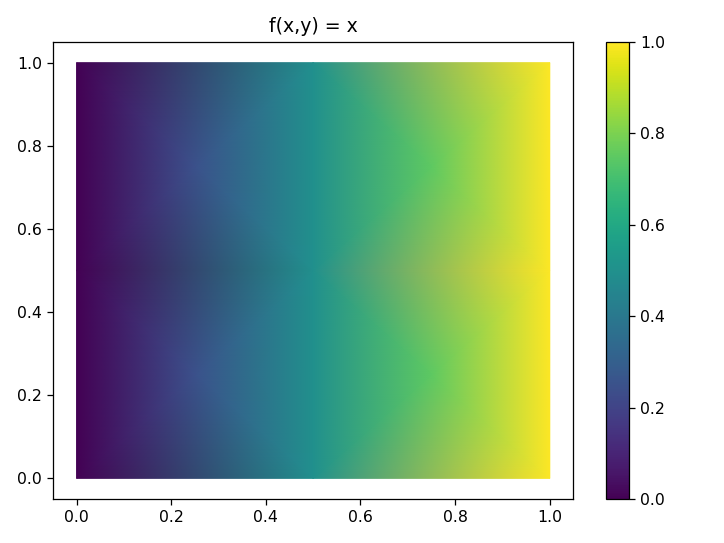

In [8]:
from interpolations import interpolate_lagrange_p1
from visualizations import visualize_lagrange_p1

f = ExpressionFunction('x[..., 0]', dim_domain=2, shape_range=())
f_h = interpolate_lagrange_p1(f, grid)
print(np.sqrt(h1_semi_product.apply2(f_h, f_h)))

visualize_lagrange_p1(f_h, grid, 'f(x,y) = x')

6. Verifizieren Sie das Ergebnis.

Es gilt $\nabla f (x, y) = (1, 0)^\top$, also

$$|f_h|_{H^1(\Omega)}^2 = \int_\Omega \nabla f_h \cdot \nabla f_h \text{d}x = \int_\Omega (1, 0)^\top \cdot (1, 0)^\top\text{d}x = \int_\Omega \text{d}x = 1$$

### Bemerkung: Matrixdarstellung von Operatoren, Bilinearformen und Produkten

Jeder lineare Operator $B: V \to W$ zwischen endlichdimensionalen Hilberträumen

* $V$ mit Dimension $J := \dim(V)$ und Basis $\big\{ \varphi_1, \dots, \varphi_J \big\}$ (der _Ansatzraum_)

* $W$ mit Dimension $I := \dim(W)$ und Basis $\big\{ \psi_i, \dots, \psi_I \big\}$ (der _Testraum_)

(bzw. jede Bilineaform $b: W \times V \to \mathbb{R}$) lässt sich eindeutig mit einer Matrix $\underline{b} \in \mathbb{R}^{I \times J}$ identifizieren (der Basisdarstellung von $b$):

$$\underline{b}_{i, j} := b(\psi_i, \varphi_j)$$

Analog lässt sich jedes Funktional $l: W \to \mathbb{R}$ eindeutig mit einem Vektor $\underline{l} \in \mathbb{R}^I$, gegeben durch $\underline{l}_i := l(\psi_i)$, identifizieren.

Gegeben diskrete Funktionen $v_h \in V$ und $w_h \in W$ mit DoF-Vektoren $\underline{v_h} \in \mathbb{R}^J$ und $\underline{w_h} \in \mathbb{R}^I$ lässt sich außerdem die Anwendung von $B$ bzw. $b$ durch Matrix/Vektor Multiplikation darstellen:

$$B[v_h](w_h) = b(w_h, v_h) = \underline{w_h}^\top\; \underline{b}\; \underline{v_h}$$

## Aufgabe 2: Matrixdarstellung von $\Delta$

Wir betrachten als Approximaiton des Hilbertraums $V = W = H^1(\Omega)$ den endlichdimensionalen Hilbertraum $S_h^1 \subset H^1(\Omega)$ von [Blatt 1, Aufgabe 2](https://www.uni-muenster.de/AMM/Veranstaltungen/SS19/Modellreduktion/blatt_01__aufgaben.html#Aufgabe-2:-Lagrange-Interpolation) zu einem gegebenen Gitter $\mathcal{T}_h$ von $\Omega$, mit Dimension $I := |\mathcal{T}_h^d|$ (Anzahl der Knotenpunkte des Gitters) und entsprechender Lagrange Basis.

Viele Operator in pyMOR bieten die Möglichkeit, ihre Matrixdarstellung zu assemblieren (wenn Sie nicht von einem Parameter abhängen). Suchen Sie in der Dokumentation von `OperatorInterface` (alle Operatoren in pyMOR leiten davon ab) nach einer entsprechenden möglichkeit.

1. Assemblieren Sie die Matrixdarstellung von $\Delta$ bezüglich $S_h^1$ und geben Sie den resultierenden Operator und dessen Typ aus.

In [9]:
h1_semi_product = h1_semi_product.assemble()
print('h1_semi_product is a {}'.format(h1_semi_product))
print('the type of h1_semi_product is {}'.format(type(h1_semi_product)))

00:00 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:00 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:00 DiffusionOperatorP1: Determine global dofs ...
00:00 DiffusionOperatorP1: Boundary treatment ...
00:00 DiffusionOperatorP1: Assemble system matrix ...


h1_semi_product is a DiffusionOperatorP1: R^13 --> R^13  (parameter type: None, class: NumpyMatrixOperator)
the type of h1_semi_product is <class 'pymor.operators.numpy.NumpyMatrixOperator'>


2. Suchen Sie in der Dokumentation des resultierenden assemblierten Operators nach einer Möglichkeit, die zugrundeliegende Matrix zu extrahieren.
   Lassen Sie sich die Matrix und ihren Typ anzeigen. Lesen Sie das Beispiel in der Dokumentation diser Art von Matrix, falls Sie bisher keine dünnbesetzten Matrizen (_sparse_)  kennen.

In [10]:
# NumpyMatrixOperator?

h1_semi_mat = h1_semi_product.matrix
print('the matrix representation of h1_semi_product is a {}'.format(type(h1_semi_mat)))
print('the matrix representation of h1_semi_product is \n{}'.format(h1_semi_mat))

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html

the matrix representation of h1_semi_product is a <class 'scipy.sparse.csc.csc_matrix'>
the matrix representation of h1_semi_product is 
  (0, 0)	1.0
  (1, 0)	0.0
  (3, 0)	0.0
  (9, 0)	-1.0
  (0, 1)	0.0
  (1, 1)	2.0
  (2, 1)	0.0
  (4, 1)	0.0
  (9, 1)	-1.0
  (10, 1)	-1.0
  (1, 2)	0.0
  (2, 2)	1.0
  (5, 2)	0.0
  (10, 2)	-1.0
  (0, 3)	0.0
  (3, 3)	2.0
  (4, 3)	0.0
  (6, 3)	0.0
  (9, 3)	-1.0
  (11, 3)	-1.0
  (1, 4)	0.0
  (3, 4)	0.0
  (4, 4)	4.0
  (5, 4)	0.0
  (7, 4)	0.0
  :	:
  (12, 7)	-1.0
  (5, 8)	0.0
  (7, 8)	0.0
  (8, 8)	1.0
  (12, 8)	-1.0
  (0, 9)	-1.0
  (1, 9)	-1.0
  (3, 9)	-1.0
  (4, 9)	-1.0
  (9, 9)	4.0
  (1, 10)	-1.0
  (2, 10)	-1.0
  (4, 10)	-1.0
  (5, 10)	-1.0
  (10, 10)	4.0
  (3, 11)	-1.0
  (4, 11)	-1.0
  (6, 11)	-1.0
  (7, 11)	-1.0
  (11, 11)	4.0
  (4, 12)	-1.0
  (5, 12)	-1.0
  (7, 12)	-1.0
  (8, 12)	-1.0
  (12, 12)	4.0


3. Suchen Sie in der Dokumentation der Sparse-Matrix nach einer Möglichkeit, die Matrix in ein klassisches Format (_dense_) zu konvertieren, konvertieren Sie die Matrix und lassen Sie sie erneut ausgeben.

In [11]:
h1_semi_mat = h1_semi_mat.todense()
print(type(h1_semi_mat))
print('the matrix representation of h1_semi_product is \n{}'.format(h1_semi_mat))

<class 'numpy.matrix'>
the matrix representation of h1_semi_product is 
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  2.  0.  0.  0.  0.  0.  0.  0. -1. -1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  2.  0.  0.  0.  0.  0. -1.  0. -1.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  0.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.]
 [-1. -1.  0. -1. -1.  0.  0.  0.  0.  4.  0.  0.  0.]
 [ 0. -1. -1.  0. -1. -1.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0. -1. -1.  0. -1. -1.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0. -1. -1.  0. -1. -1.  0.  0.  0.  4.]]


4. Berechnen Sie $b(f_h, f_h)$, indem Sie die Matrixdarstellung nutzen.

   - Suchen Sie dafür nach einer Möglichkeit, den DoF Vektor von $f_h$ zu extrahieren (Typ von `f_h` anzeigen lassen, Dokumentation nutzen).
   - Vergleichen Sie das Ergebnis mit der Berechnung von oben.

In [12]:
#  - Anwendung des Produkts über die Matrixdarstellung/DoF Vektor
print(f_h.data.dot(h1_semi_mat.dot(f_h.data.T)))
#  - moderne Syntax
print(f_h.data @ (h1_semi_mat @ f_h.data.T))
#  - Anwedung des Produkts über die Bilinearform
print(h1_semi_product.apply2(f_h, f_h))

[[1.]]
[[1.]]
[[1.]]


5. Zeigen Sie anhand von Gegenbeispielen, dass $\Delta$ bezüglich $H^1$ kein Produkt ist, und damit keine Norm induziert (sondern nur eine Halbnorm).

In [13]:
# Was sollte ein Produkt erfüllen?

# * Symmetrie
if np.all(h1_semi_mat == h1_semi_mat.T):
    print('=> is symmetric')
else:
    print('=> is NOT symmetric!')

# * Positive definitheit:
#   - zB alle Eigenwerte > 0
min_ev = np.linalg.eigvals(h1_semi_mat).min()
if np.allclose(min_ev, 0.) or min_ev < 0.:
    print('=> the minimum eigenvalue {} is 0 or negative!'.format(min_ev))

#   - zB Determinante != 0
det = np.linalg.det(h1_semi_mat)
if np.allclose(det, 0.):
    print('=> det is 0!')

# * Wenn b_h(v_h, v_h) != 0 so muss schon v_h = 0 gelten
one = h1_semi_product.source.from_data(np.ones(cg_space.dim))
print('(1, 1)_H^1 = {}'.format(h1_semi_product.apply2(one, one)))

# => h1_semi_product ist kein Produkt bezüglich H^1 (wie erwartet)

=> is symmetric
=> the minimum eigenvalue -5.563091559623418e-16 is 0 or negative!
=> det is 0!
(1, 1)_H^1 = [[0.]]


### Bemerkung: Realisierung von $H^1_0$

Gegeben $S_h^1$ als Approximation von $H^1(\Omega)$ zu einem Gitter $\mathcal{T}_h$, wie erhalten wir eine Approximation von $H^1_0(\Omega)$?

Sei dazu $\mathcal{T}_h^d$ die Menge der Knoten des Gitters und sei $\mathcal{T}_h^{\partial\Omega} \subset \mathcal{T}_h^d$ die Teilmenge derjenigen Knoten, die auf dem Gebietsrand $\partial \Omega$ liegen.

* Haben wir zu $v_h \in S_h^1$ den DoF Vektor $\underline{v_h} \in \mathbb{R}^I$ gegeben, so gilt

  $$v_h \in S_h^1 \cap H^1_0(\Omega) \quad\Leftrightarrow\quad \underline{v_h}_i = 0\quad\text{für alle } \nu_i \in \mathcal{T}_h^{\partial \Omega}$$

* Haben wir die Matrix $\underline{b_h}$ zu einer Bilinearform $b_h$ bezüglich der Basis von $S_h^1 \subset H^1(\Omega)$ gegeben, so sind die Zeilen der Matrix mit dem zweiten Argument von $b_h$ assoziiert (Funktionen aus dem _Ansatzraum_) und die Spalten der Matrix mit dem ersten Argument von $b_h$ assoziiert (Funktionen aus dem _Testraum_), siehe oben.

  `=>` Wir erhalten also die Matrix der Einschränkung von $b_h$ bezüglich des _ersten_ (bzw. _zweiten_) Argumentes auf $S_h^1 \cap H^1_0(\Omega)$, indem wir all jene _Spalten_ (bzw. _Zeilen_) von $\underline{b_h}$ durch Einheitsspalten (bzw. Einheitszeilen) ersetzen, die zu einem Randknoten des Gitters gehören.

### Aufgabe 3: Dirichlet Randwerte und Approximationen von $H^1_0$

1. Zur Modellierung des Dirichlet-Randes bietet pyMOR sogenannten _boundary infos_ an, die von `BoundaryInfoInterface` ableiten.
   Diese erlauben es, zu einem gegeben Gitter diejenigen Randknoten zu erhalten, die mit dem entsprechenden Teil des Gebietsrandes assoziiert zind.

   - Suchen Sie in der API Dokumentation des `pymor.grids.boundaryinfos` Moduls nach einer Möglichkeit, den gesamten Rand von `\Omega` als Dirichlet-Rand zu definieren und legen Sie ein entsprechendes Objekt `boundary_info` an.
   - Geben Sie alle Arten von Randwerten aus, die `boundary_info` beschreibt.
   - Nutzen Sie `boundary_info`, um die Indices aller Randknoten des Gitters zu erhalten, und vergleichen Sie diese mit der Dokumentation des Gitters.
   - Nuzten Sie diese Indices, um die Koordinaten aller Randknoten des Gitters zu erhalten.

In [14]:
boundary_info = AllDirichletBoundaryInfo(grid)
print(boundary_info.boundary_types)
vertices = grid.centers(grid.dim)
print(len(vertices))
boundary_indices = np.where(boundary_info.mask('dirichlet', codim=2))[0]
print(boundary_indices)
boundary_vertices = vertices[boundary_indices]
print(len(boundary_vertices))
print(boundary_vertices)

frozenset({'dirichlet'})
13
[0 1 2 3 5 6 7 8]
8
[[5.55111512e-17 5.55111512e-17]
 [5.00000000e-01 5.55111512e-17]
 [1.00000000e+00 5.55111512e-17]
 [5.55111512e-17 5.00000000e-01]
 [1.00000000e+00 5.00000000e-01]
 [5.55111512e-17 1.00000000e+00]
 [5.00000000e-01 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00]]


2. Implementieren Sie die Interpolation $\Pi_{S_h^1\cap H^1_0(\Omega)}: C^0(\Omega) \to S_h^1\cap H^1_0(\Omega)$, die zusätzlich zur Lagrange-Interpolation noch die korrekte Randwertbehandlung vornimmt.

   - Erweitern Sie dazu die `interpolate_lagrange_p1` Funktion, sodass eine optionale `boundary_info` übergeben werden kann, die den Dirichlet Rand beschreibt.
   - Wird eine solche übergeben, sollen alle Freiheitsgerade auf dem Dirichlet Rand auf 0 gesetzt werden.
   - Testen Sie die neue Funktion, indem Sie die Funktion $f(x, y) = x$ einmal in $H^1(\Omega)$ und einmal in $H^1_0(\Omega)$ interpolieren und anzeigen.

   _Bemerkung_: durch die Änderung der Funktion `interpolate_lagrange_p1` in der `interpolations.py` Datei stimmt das bisher importierte Modul nicht mehr mit dieser Datei überein! Starten Sie zB den Kernel des Notebooks neu, um das Modul neu zu importieren.

<IPython.core.display.Javascript object>


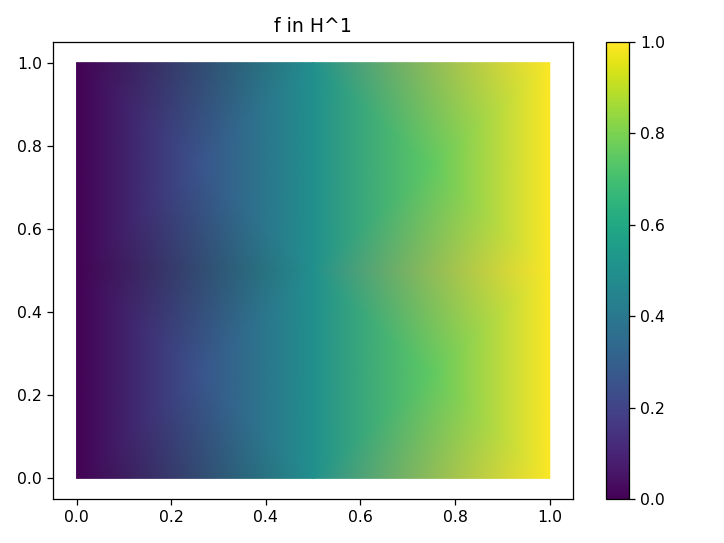

In [15]:
f_in_H1 = interpolate_lagrange_p1(f, grid)
visualize_lagrange_p1(f_in_H1, grid, 'f in H^1')

<IPython.core.display.Javascript object>


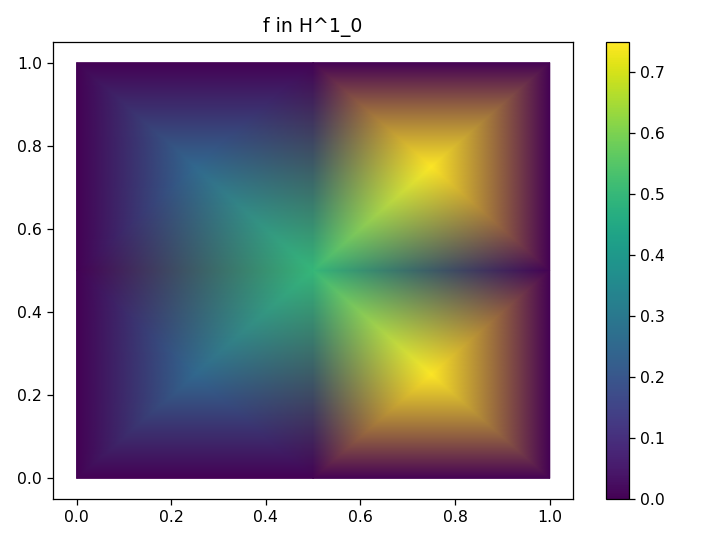

In [16]:
f_in_H10 = interpolate_lagrange_p1(f, grid, boundary_info)
visualize_lagrange_p1(f_in_H10, grid, 'f in H^1_0')

3. Nutzen Sie den `DiffusionOperatorP1`, um das $H^1_0$ Produkt bezüglich $S_h^1$ zu assemblieren.

   - Legen Sie einen geeigneten Operator an und lassen Sie sich die entsprechende Matrixdarstellung anzeigen.
   - Stellen Sie sicher, dass diejenigen Zeilen und Spalten in der Matrixdarstellung, die zu einem Randknoten des Gitters gehören, korrekt sind.

In [17]:
h10_product = DiffusionOperatorP1(grid, boundary_info=boundary_info, dirichlet_clear_columns=True)
h10_product = h10_product.assemble()
h10_mat = h10_product.matrix.todense()
print('the matrix representation of h10_product is \n{}'.format(h10_mat))
print(np.allclose(h10_mat[boundary_indices, :], np.eye(h10_mat.shape[0])[boundary_indices, :]))
print(np.allclose(h10_mat[:, boundary_indices], np.eye(h10_mat.shape[0])[:, boundary_indices]))

00:01 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorP1: Determine global dofs ...
00:01 DiffusionOperatorP1: Boundary treatment ...
00:01 DiffusionOperatorP1: Assemble system matrix ...


the matrix representation of h10_product is 
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  4.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  4.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  4.]]
True
True


4. Zeigen Sie anhand von Beispielen, dass $\Delta$ bezüglich $H^1_0(\Omega)$ ein Produkt ist (bzw. eine Norm induziert).

In [18]:
# Was sollte ein Produkt erfüllen?

# * Symmetrie
if np.all(h10_mat == h10_mat.T):
    print('=> is symmetric')
else:
    print('=> is NOT symmetric!')

# * Positive definitheit:
#   - zB alle Eigenwerte > 0
min_ev = np.linalg.eigvals(h10_mat).min()
if np.allclose(min_ev, 0.) or min_ev < 0.:
    print('=> the minimum eigenvalue {} is 0 or negative!'.format(min_ev))
else:
    print('=> eigenvalues are positive')

#   - zB Determinante != 0
det = np.linalg.det(h10_mat)
if np.allclose(det, 0.):
    print('=> det is 0!')
else:
    print('=> seems invertible')

# * Wenn b_h(v_h, v_h) != 0 so muss schon v_h = 0 gelten
one = interpolate_lagrange_p1(ConstantFunction(1, 2), grid, boundary_info)
print('(1, 1)_H^1 = {}'.format(h10_product.apply2(one, one)))

# => h1_semi_product ist kein Produkt bezüglich H^1 (wie erwartet)

=> is symmetric
=> eigenvalues are positive
=> seems invertible
(1, 1)_H^1 = [[12.]]


### Bemerkung: lösen des linearen Gleichungssystems

Für gegebenes $b$ und $l$ und deren Matrix und Vektordarstellung $\underline{b_h}$ und $\underline{l_h}$ ist folgendes äquivalent:

* $u_h \in S_h^1 \cap H^1_0(\Omega)$ ist die Lösung des Variationsproblems

  $$b(u_h, v_h) = l(v_h)\quad\quad\text{für alle } v_h \in S_h^1$$

* $\underline{u_h} \in \mathbb{R}^I$ ist die Lösung des linearen Gleichungssystems

  $$\underline{b_h}\; \underline{u_h} = \underline{l_h},$$
  
  wobei
  
  - $\underline{b_h}$ die Matrixdarstellung von $b$ bezüglich $S_h^1$ ist und alle Zeilen, die mit einem Dirichlet-Knoten assoziiert sind, durch Einheitszeilen erzetzt wurden; und
  - $\underline{l_h}$ die Vektordarstellung von $l$ bezüglich $S_h^1$ ist und alle Einträge, die mit einem Dirichlet-Knoten assoziiert sind, durch 0 ersetzt wurden.
  
  Was folgt dadurch für die Einträge von $\underline{u_h}$, die mit einem Dirichlet-Knoten assoziiert sind?

## Aufgabe 4: lösen des vereinfachten Diffusionsproblems

Wir betrachten das parameter-unabhängige Diffusionsproblem von oben mit

* $\Omega = [-1, 1]^2$
* $A = 1$
* $f(x, y) = \frac{1}{2}\pi^2\; \cos(\frac{1}{2}\pi x)\; \cos(\frac{1}{2}\pi y)$


1. Erstellen Sie ein entsprechendes Gebiet ein Dreiecksgitter mit $8^2$ Intervallen und eine Boundaryinfo an, visualisieren Sie das Gitter.

<IPython.core.display.Javascript object>


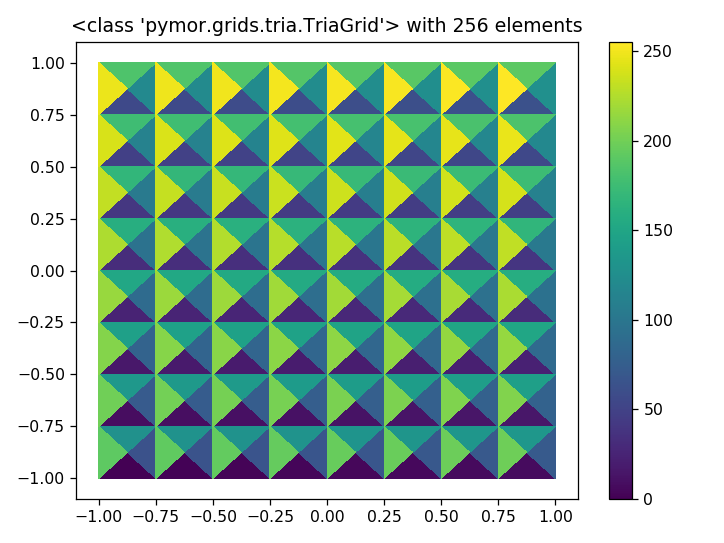

In [19]:
omega = RectDomain(([-1, -1], [1, 1]))
grid = TriaGrid(domain=omega.domain, num_intervals=(8, 8))
boundary_info = AllDirichletBoundaryInfo(grid)
visualize_grid(grid)

2. Legen Sie Datenfunktionen für $A$ und $f$ an, visualisieren Sie $f$.

   _Hinweis:_ nutzen Sie _nicht_ die `ExpressionFunction` für $A$.

<IPython.core.display.Javascript object>


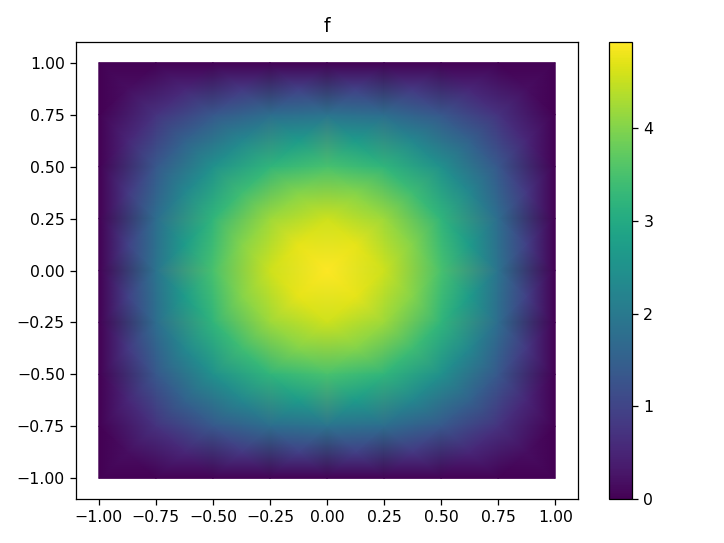

In [20]:
diffusion = ConstantFunction(1, dim_domain=omega.dim)
force = ExpressionFunction('0.5 * np.pi**2 * np.cos(0.5 * np.pi * x[..., 0]) * np.cos(0.5 * np.pi * x[..., 1])', 2, ())
visualize_lagrange_p1(interpolate_lagrange_p1(force, grid), grid, 'f')

3. Erstellen Sie die Bilineaform $b$ und assemblieren Sie diese.

In [21]:
b_h = DiffusionOperatorP1(grid, boundary_info=boundary_info, diffusion_function=diffusion)
b_h = b_h.assemble()

00:01 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorP1: Determine global dofs ...
00:01 DiffusionOperatorP1: Boundary treatment ...
00:01 DiffusionOperatorP1: Assemble system matrix ...


4. Nutzen Sie das `L2ProductFunctionalP1` um die rechte Seite $l$ zu assemblieren, achten Sie auf korrekte Randwertbehandlung.
   
   Von welchem Typ ist das assemblierte Funktional?

In [22]:
from pymor.operators.cg import L2ProductFunctionalP1

l_h = L2ProductFunctionalP1(grid, force, dirichlet_clear_dofs=True, boundary_info=boundary_info)
print('l_h is a {}'.format(l_h))
print('the type of l_h is {}'.format(type(l_h)))

l_h is a L2ProductFunctionalP1: R^1 --> R^145  (parameter type: {}, class: L2ProductFunctionalP1)
the type of l_h is <class 'pymor.operators.cg.L2ProductFunctionalP1'>


In [23]:
l_h = l_h.assemble()
print('l_h is a {}'.format(l_h))
print('the type of l_h is {}'.format(type(l_h)))

l_h is a L2ProductFunctionalP1: R^1 --> R^145  (parameter type: None, class: NumpyMatrixOperator)
the type of l_h is <class 'pymor.operators.numpy.NumpyMatrixOperator'>


5. Lösen Sie das lineare Gleichungssystem, um $u_h$ zu erhalten und visualisieren Sie die Lösung.

   Suchen Sie dazu in der Dokumentation nach einer Möglichkeit, um die Vektordarstellung von $l$ zu erhalten, und um den zu $b$ zugehörigen Operator zu invertieren.

<IPython.core.display.Javascript object>


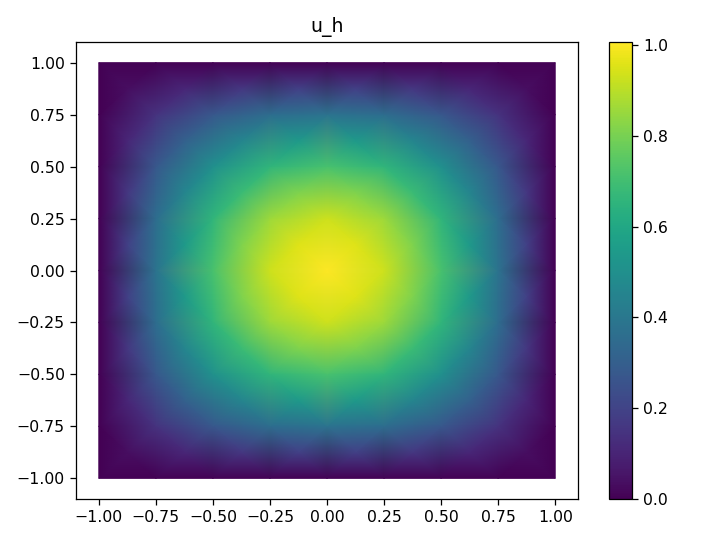

In [24]:
u_h = b_h.apply_inverse(l_h.as_vector())
visualize_lagrange_p1(u_h, grid, 'u_h')

Die exakte Lösung des Problems ist durch

$$u(x, y) = \frac{1}{2}\pi^2\; \cos(\frac{1}{2}\pi x)\; \cos(\frac{1}{2}\pi y)$$

gegeben.

6. Erstellen Sie eine Approximation der Lösung $u$ auf dem Gitter durch Interpolation und visualizieren Sie diese.

<IPython.core.display.Javascript object>


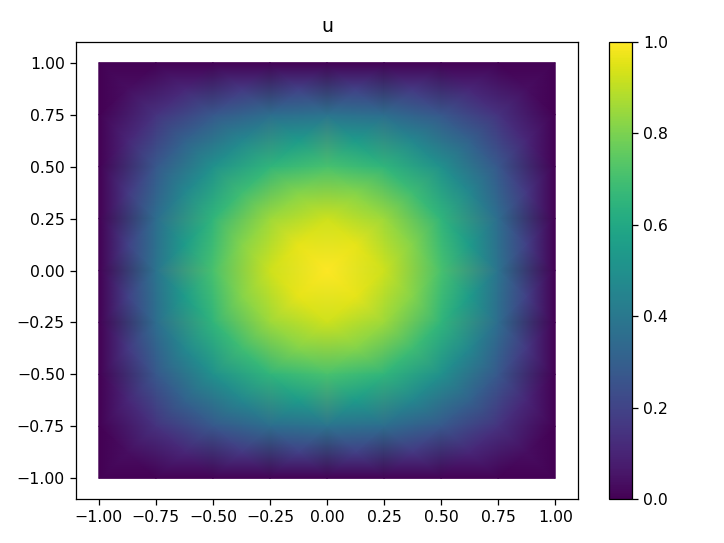

In [25]:
u = interpolate_lagrange_p1(ExpressionFunction('np.cos(0.5 * np.pi * x[..., 0]) * np.cos(0.5 * np.pi * x[..., 1])', 2, ()), grid)
visualize_lagrange_p1(u, grid, 'u')

7. Visualisieren Sie den Approximationsfehler $u - u_h$ berechnen Sie den relativen Approximationsfehler in der $H^1_0$ norm.

00:01 DiffusionOperatorP1: Calulate gradients of shape functions transformed by reference map ...
00:01 DiffusionOperatorP1: Calculate all local scalar products beween gradients ...
00:01 DiffusionOperatorP1: Determine global dofs ...
00:01 DiffusionOperatorP1: Boundary treatment ...
00:01 DiffusionOperatorP1: Assemble system matrix ...


approx. relative H^1_0 error: [0.06852583]


<IPython.core.display.Javascript object>


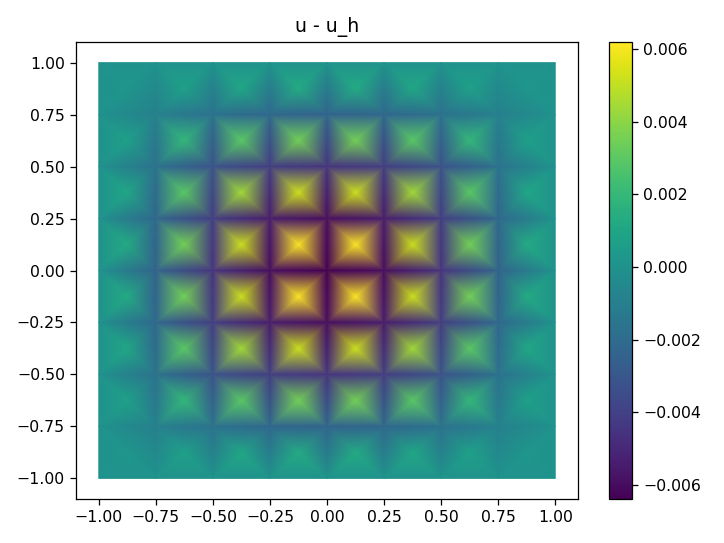

In [26]:
h10_product = DiffusionOperatorP1(grid, boundary_info=boundary_info, dirichlet_clear_columns=True)
h10_product = h10_product.assemble()

print('approx. relative H^1_0 error: {}'.format(np.sqrt(h10_product.apply2(u - u_h, u - u_h)[0] / np.sqrt(h10_product.apply2(u, u)[0]))))

visualize_lagrange_p1(u - u_h, grid, 'u - u_h')

8. Inwieweit ist dieser berechnete Fehler eine akkurate Repräsentation für den Fehler?

Es gilt

$$\|u - u_h\| \leq \|u - \Pi_{S_h^1}[u]\| + \|\Pi_{S_h^1}[u] - u_h\|$$

und wir haben nur den letzten Term berechnet.